In [43]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [92]:
#importing dataset
os.chdir('C:/Users/emrem/OneDrive/Masaüstü/YTÜ Yüksek/İleri Regresyon/Ridge Regression/')
data = pd.read_excel('AnalyticalCaseStudy_Data.xlsx', sheet_name='Sayfa1')

In [93]:
#data type review
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
Total Risk       30 non-null float64
Total Limit      30 non-null float64
Number_of_Emp    30 non-null int64
Profit           30 non-null float64
dtypes: float64(3), int64(1)
memory usage: 1.0 KB


,Total Risk,Total Limit,Number_of_Emp,Profit
0,21.6,16.8,46,12.9
1,17.4,14.9,40,12.4
2,11.4,7.4,44,8.2
3,14.7,14.7,46,9.5
4,21.4,16.7,27,12.7


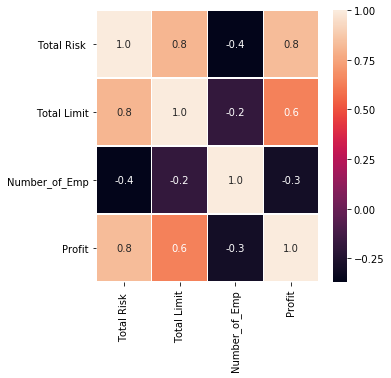

In [94]:
#Correlation Heatmap
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [95]:
X = data[["Total Risk ","Total Limit","Number_of_Emp"]] # independent variables
y = data["Profit"] # dependent variable

In [96]:
#VIF(variance inflacion factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,50.0,Total Risk
1,50.8,Total Limit
2,2.6,Number_of_Emp


In [106]:
###########
#RIDGE
###########
alphas = 10**np.linspace(10,-2,100)*0.5

#standardized the variables so that they are on the same scale
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 3)

Text(0,0.5,'coefs')

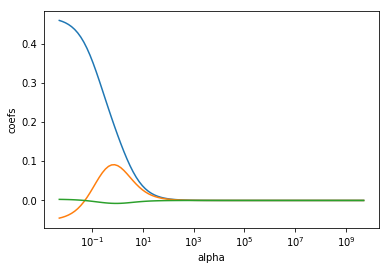

In [108]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coefs')

In [98]:
#finding optimal alpha
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X, y)
ridgecv.alpha_

0.005

In [99]:
#building model
Ridge_model = Ridge(alpha = ridgecv.alpha_, normalize = True)
RR_model=Ridge_model.fit(X, y)
RR_predictions = RR_model.predict(X)

Ridge_model.fit(X, y)
pd.Series(Ridge_model.coef_, index = X.columns)

Total Risk       0.459957
Total Limit     -0.045147
Number_of_Emp    0.002749
dtype: float64

In [100]:
#MSE of Ridge Regression
mean_squared_error(y, Ridge_model.predict(X))

0.9878109047906787

In [102]:
###########
#LINEER
###########
OLS_model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
OLS_predictions = OLS_model.predict(X)
# Print out the statistics
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     964.3
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           1.47e-27
Time:                        01:21:25   Log-Likelihood:                -45.912
No. Observations:                  30   AIC:                             97.82
Df Residuals:                      27   BIC:                             102.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Total Risk        0.6492      0.080      8.163      0.000       0.486       0.812
Total Limit      -0.0926      0.100     -0.923      0.364      -0.298       0.113
Number_of_Emp     0.0230      0.011      2.009      0.055      -0.000       0.046
==============================================================================
Omnibus:                        6.267   Durbin-Watson:                   2.436
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                6.603
Skew:                           0.366   Prob(JB):                       0.0368
Kurtosis:                       5.179   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
#MSE of Linear Regression(OLS)
mean_squared_error(y, OLS_predictions)

1.249698939062769